___
# Random Forest Project 

For this project we will be using data that was made available from Lending Club. Lending Club is a platform that connects borrowers with investors. An important characteristic for investors is whether borrowers will pay them back. Therefore, our goals is to create a model that can help predict whether a borrower will pay back.

The data we will be using comes from 2007 - 2010 and we will try to classify whether a borrower paid back their loan in full. The following data has been cleaned for NA values.
___
#### Columns Provided:
* **Credit Policy**: 1 for customer meeting credit underwriting criteria, 0 otherwise.
* **Purpose**: Purpose of the loan: "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other".
* **Interest Rate**: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Riskier borrowers are assigned higher interest rates.
* **Installment**: The monthly installments owed if the loan is funded.
* **Log Annual Income**: The natural log of the self-reported annual income of the borrower.
* **Debt to Income (dti)**: The debt-to-income ratio of the borrower (debt divided by annual income).
* **FICO**: The FICO credit score of the borrower.
* **Days With Credit Line**: The number of days the borrower has had a credit line.
* **Revolving Balance**: The borrower's revolving balance (amount unpaid at the end of the billing cycle).
* **Revolving Utility**: The borrower's revolving line utilization rate (credit line used relative to total credit available).
* **Inqueries Last 6 Months**: The borrower's number of inquiries by creditors in the last 6 months.
* **Delinquency 2 Years**: Times the borrower had been +30 days past due on a payment in the past 2 years.
* **Public Records**: The borrower's number of derogatory public records (bankruptcy filings, tax lines, or judgments).

___
# Import Libraries

**Import the usual libraries for pandas and plotting. You can import sklearn later on.**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

## Get the Data

** Use pandas to read loan_data.csv as a dataframe called loans.**

In [2]:
loan = pd.read_csv('loan_data.csv')

** Check out the info(), head(), and describe() methods on loans.**

In [3]:
loan.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [4]:
loan.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [5]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


___
# Exploratory Data Analysis

Let's explore and visualze the data with seaborn and pandas. We'll explore for any relationships in the dataset to see if we can test for any variables.

Text(0.5, 0, 'FICO')

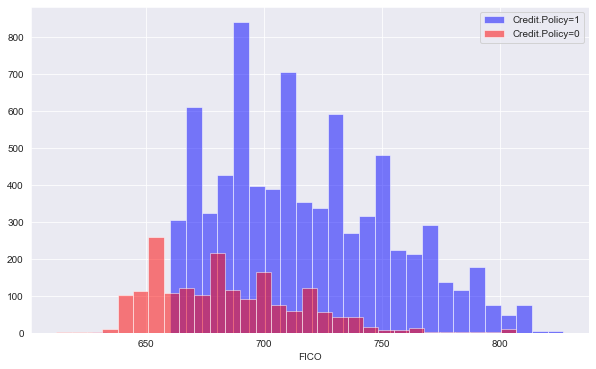

In [6]:
plt.figure(figsize=(10,6))
sns.set_style('darkgrid')
loan[loan['credit.policy']==1]['fico'].hist(alpha=0.5, color ='blue',
                                             bins=30, label='Credit.Policy=1')
loan[loan['credit.policy']==0]['fico'].hist(alpha=0.5, color ='red',
                                             bins=30, label='Credit.Policy=0')
plt.legend()
plt.xlabel('FICO')

Text(0.5, 0, 'FICO')

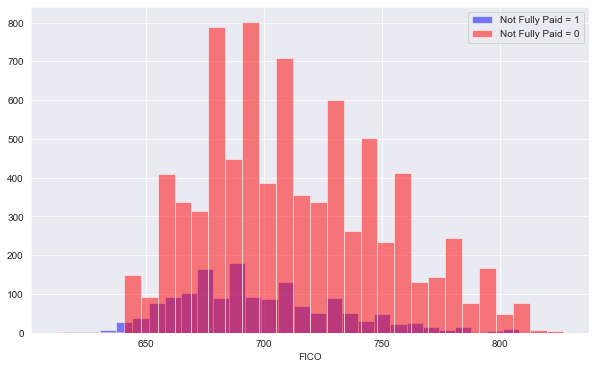

In [7]:
plt.figure(figsize=(10,6))
sns.set_style('darkgrid')
loan[loan['not.fully.paid']==1]['fico'].hist(alpha=0.5, color ='blue',
                                             bins=30, label='Not Fully Paid = 1')
loan[loan['not.fully.paid']==0]['fico'].hist(alpha=0.5, color ='red',
                                             bins=30, label='Not Fully Paid = 0')
plt.legend()
plt.xlabel('FICO')

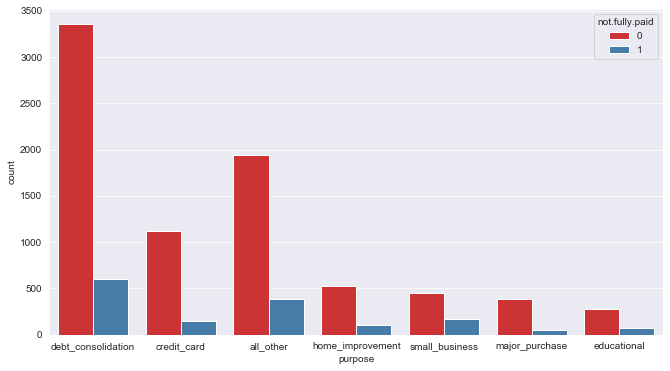

In [8]:
plt.figure(figsize=(11,6))
sns.countplot(data=loan, x='purpose', hue='not.fully.paid', palette='Set1')

In [9]:
list(loan.columns)

['credit.policy',
 'purpose',
 'int.rate',
 'installment',
 'log.annual.inc',
 'dti',
 'fico',
 'days.with.cr.line',
 'revol.bal',
 'revol.util',
 'inq.last.6mths',
 'delinq.2yrs',
 'pub.rec',
 'not.fully.paid']

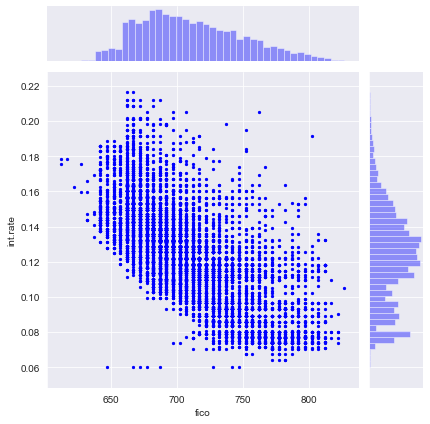

In [10]:
sns.jointplot(data=loan, x='fico', y='int.rate', color='blue', s=5)

<Figure size 792x504 with 0 Axes>

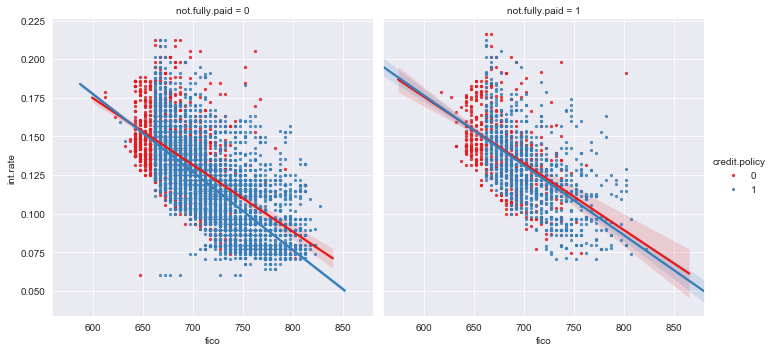

In [11]:
plt.figure(figsize=(11,7))
sns.lmplot(data=loan, x='fico', y='int.rate', hue='credit.policy',
          col='not.fully.paid', palette='Set1', scatter_kws={'s': 5})

___
# Setting up the Data

### Categorical Features

Since the purpose column is filled with categorical data, we should encode it so that sklearn can understand it. For this, we transform it into dummy variables, which will account for the various categories in the column.

In [13]:
cat_feats = ['purpose']

In [14]:
final_data = pd.get_dummies(loan, columns=cat_feats, drop_first=True)

In [15]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
credit.policy                 9578 non-null int64
int.rate                      9578 non-null float64
installment                   9578 non-null float64
log.annual.inc                9578 non-null float64
dti                           9578 non-null float64
fico                          9578 non-null int64
days.with.cr.line             9578 non-null float64
revol.bal                     9578 non-null int64
revol.util                    9578 non-null float64
inq.last.6mths                9578 non-null int64
delinq.2yrs                   9578 non-null int64
pub.rec                       9578 non-null int64
not.fully.paid                9578 non-null int64
purpose_credit_card           9578 non-null uint8
purpose_debt_consolidation    9578 non-null uint8
purpose_educational           9578 non-null uint8
purpose_home_improvement      9578 non-null uint8
purpose_major_purchase        9

___
## Train Test Split

Now that the data has been encoded, we can split our data into a training and testing set!

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X = final_data.drop('not.fully.paid', axis=1)
y = final_data['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

___
## Training a Decision Tree Model

With the data being split, let's plug the set into a single decision tree.

In [18]:
from sklearn.tree import DecisionTreeClassifier

In [21]:
dtree = DecisionTreeClassifier()

In [22]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

___
## Predictions and Evaluation of Decision Tree
Now that the model has been trained, we can test how it performed.

In [23]:
prediction = dtree.predict(X_test)

In [27]:
from sklearn.metrics import confusion_matrix, classification_report

In [35]:
print('Confusion Matrix\n')
print(confusion_matrix(y_test, prediction))
print('\n\n')
print('Classification Report\n')
print(classification_report(y_test,prediction))

Confusion Matrix

[[2009  399]
 [ 368   98]]



Classification Report

              precision    recall  f1-score   support

           0       0.85      0.83      0.84      2408
           1       0.20      0.21      0.20       466

    accuracy                           0.73      2874
   macro avg       0.52      0.52      0.52      2874
weighted avg       0.74      0.73      0.74      2874



**It seems like the Decision Tree model did not perform well, let's try the Random Forest model and see if we get improved results**

___
## Training the Random Forest model

To begin, let's train the model similar to the prior steps but with the Random Forest model.

In [36]:
from sklearn.ensemble import RandomForestClassifier

In [53]:
rfc = RandomForestClassifier(n_estimators=500)

In [54]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

### Predictions and Evaluation

Now that we have the model trained, let's evaluate it with the test set.

In [55]:
prediction = rfc.predict(X_test)

In [56]:
from sklearn.metrics import confusion_matrix, classification_report

In [57]:
print('Confusion Matrix\n')
print(confusion_matrix(y_test, prediction))
print('\n\n')
print('Classification Report\n')
print(classification_report(y_test,prediction))

Confusion Matrix

[[2395   13]
 [ 457    9]]



Classification Report

              precision    recall  f1-score   support

           0       0.84      0.99      0.91      2408
           1       0.41      0.02      0.04       466

    accuracy                           0.84      2874
   macro avg       0.62      0.51      0.47      2874
weighted avg       0.77      0.84      0.77      2874



___
## Conclusion
It seems like neither the Decision Tree nor Random Forest performed well, therefore more feature engineering is needed to improve accuracy of results.